In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, shutil, cv2, time
import pandas as pd
import pickle

import keras
from keras import backend as K
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.applications import InceptionResNetV2, Xception
from keras.layers import Dense, Activation
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report
from sklearn.metrics import accuracy_score, roc_curve
import random

%matplotlib inline

Using TensorFlow backend.


In [20]:
raw_train_dir =os.listdir( "./dataset/train/")
labels = []

for filename in raw_train_dir:
    label = filename.split('.')[0]
    if label == 'dog':
        labels.append("dog")
    elif label == 'cat':
        labels.append("cat")
    else:
        labels.append("other")

df = pd.DataFrame({
    'image': raw_train_dir,
    'label': labels
})

In [21]:
df

,image,label
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat
5,cat.10000.jpg,cat
6,cat.10001.jpg,cat
7,cat.10002.jpg,cat
8,cat.10003.jpg,cat
9,cat.10004.jpg,cat


In [22]:
df['label'].value_counts()

cat      12500
other    12500
dog      12500
Name: label, dtype: int64

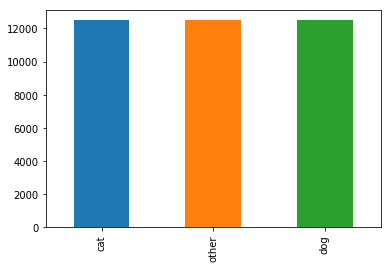

In [23]:
df['label'].value_counts().plot.bar()

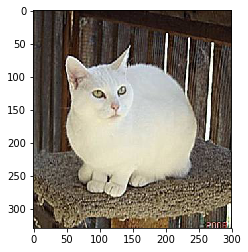

In [24]:
sample = random.choice(raw_train_dir)
image = load_img("./dataset/train/"+sample)
plt.imshow(image)

In [25]:
trainset, validateset = train_test_split(df, test_size=0.25, random_state=42)
trainset = trainset.reset_index()
validateset = validateset.reset_index()
total_trainset = trainset.shape[0]
total_validateset = validateset.shape[0]

In [26]:
trainset['label'].value_counts()

other    9444
cat      9355
dog      9326
Name: label, dtype: int64

In [34]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D, BatchNormalization
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16,VGG19
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 10
batch_size = 16

model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(256, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(512, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(3, activation='softmax')) # 2 because we have cat and dog classes

model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_25 (Batc (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 54, 54, 64)        0         
__________

In [35]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [36]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    trainset, 
    "./dataset/train/", 
    x_col='image',
    y_col='label',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 28125 images belonging to 3 classes.


In [37]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validateset, 
    "./dataset/train/", 
    x_col='image',
    y_col='label',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 9375 images belonging to 3 classes.


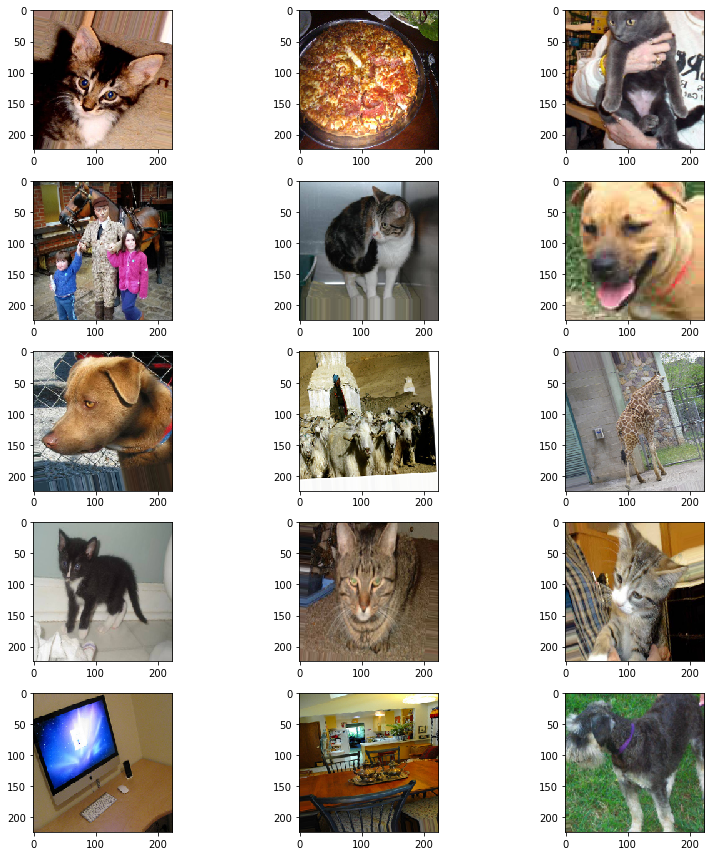

In [38]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [39]:
history1 = model1.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validateset//batch_size,
    steps_per_epoch=total_trainset//batch_size,
    callbacks=callbacks
)

Epoch 1/10
1757/1757 [==============================] - 534s 304ms/step - loss: 0.8566 - acc: 0.6311 - val_loss: 0.6069 - val_acc: 0.7308
Epoch 2/10
1757/1757 [==============================] - 516s 293ms/step - loss: 0.5670 - acc: 0.7585 - val_loss: 1.3404 - val_acc: 0.5378
Epoch 3/10
1757/1757 [==============================] - 498s 284ms/step - loss: 0.4803 - acc: 0.8057 - val_loss: 0.4166 - val_acc: 0.8255
Epoch 4/10
1757/1757 [==============================] - 563s 320ms/step - loss: 0.4207 - acc: 0.8321 - val_loss: 2.2044 - val_acc: 0.4702
Epoch 5/10
1757/1757 [==============================] - 520s 296ms/step - loss: 0.3752 - acc: 0.8526 - val_loss: 2.0476 - val_acc: 0.5964

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/10
1757/1757 [==============================] - 547s 312ms/step - loss: 0.3080 - acc: 0.8823 - val_loss: 0.4255 - val_acc: 0.8355
Epoch 7/10
1757/1757 [==============================] - 637s 362ms/step - loss: 0.2875 - ac

In [45]:
model_name="CNN.hdf5"
model1.save(model_name)

In [41]:
pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
#x = GlobalMaxPooling2D()(last_output)
# Flatten the output layer to 2 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add batch normalization
x = BatchNormalization()(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(3, activation='sigmoid')(x)

model2 = Model(pre_trained_model.input, x)

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model2.summary()

58892288/58889256 [==============================] - 10s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_poo

In [43]:
# fine-tune the model
from keras.callbacks import ModelCheckpoint
filepath="Image_best_weights.{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history2 = model2.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=total_validateset//batch_size,
    steps_per_epoch=total_trainset//batch_size,
    callbacks=callbacks
)

Epoch 1/10
1757/1757 [==============================] - 515s 293ms/step - loss: 0.3750 - acc: 0.8363 - val_loss: 0.1793 - val_acc: 0.9374
Epoch 2/10
1757/1757 [==============================] - 509s 290ms/step - loss: 0.2419 - acc: 0.9088 - val_loss: 0.1405 - val_acc: 0.9511
Epoch 3/10
1757/1757 [==============================] - 504s 287ms/step - loss: 0.2013 - acc: 0.9278 - val_loss: 0.1210 - val_acc: 0.9579
Epoch 4/10
1757/1757 [==============================] - 505s 287ms/step - loss: 0.1829 - acc: 0.9354 - val_loss: 0.1192 - val_acc: 0.9588
Epoch 5/10
1757/1757 [==============================] - 506s 288ms/step - loss: 0.1706 - acc: 0.9412 - val_loss: 0.1123 - val_acc: 0.9611
Epoch 6/10
1757/1757 [==============================] - 503s 287ms/step - loss: 0.1617 - acc: 0.9436 - val_loss: 0.1079 - val_acc: 0.9631
Epoch 7/10
1757/1757 [==============================] - 504s 287ms/step - loss: 0.1501 - acc: 0.9481 - val_loss: 0.1036 - val_acc: 0.9643
Epoch 8/10
1757/1757 [============

In [46]:
model_name="VGG19_Pretrain.hdf5"
model2.save(model_name)

In [51]:
# Create the pretraining InceptionV2 model, pop out the last dense layer
base_model3 = InceptionResNetV2(include_top=False, input_shape=input_shape)

# Freeze weight of InceptionResNetV2 layers (untrainable)
base_model3.trainable = False

# Add our Dense layers for classificaton
model3 = models.Sequential()
model3.add(base_model4)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(3, activation='sigmoid'))

# Optimizer, loss and metrics
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show model summary
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 5, 5, 1536)        54336736  
_________________________________________________________________
flatten_8 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               9830656   
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 771       
Total params: 64,168,163
Trainable params: 9,831,427
Non-trainable params: 54,336,736
_________________________________________________________________


In [52]:
history3 = model3.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=total_validateset//batch_size,
    steps_per_epoch=total_trainset//batch_size,
    callbacks=callbacks
)

Epoch 1/10
1757/1757 [==============================] - 761s 433ms/step - loss: 2.1327 - acc: 0.8573 - val_loss: 0.2891 - val_acc: 0.9647
Epoch 2/10
1757/1757 [==============================] - 673s 383ms/step - loss: 0.1963 - acc: 0.9513 - val_loss: 0.2427 - val_acc: 0.9635
Epoch 3/10
1757/1757 [==============================] - 663s 377ms/step - loss: 0.1709 - acc: 0.9580 - val_loss: 0.5543 - val_acc: 0.9318

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/10
1757/1757 [==============================] - 680s 387ms/step - loss: 0.1368 - acc: 0.9646 - val_loss: 0.2817 - val_acc: 0.9641
Epoch 5/10
1757/1757 [==============================] - 682s 388ms/step - loss: 0.1265 - acc: 0.9643 - val_loss: 0.2050 - val_acc: 0.9759
Epoch 6/10
1757/1757 [==============================] - 676s 384ms/step - loss: 0.1223 - acc: 0.9678 - val_loss: 0.3528 - val_acc: 0.9571
Epoch 7/10
1757/1757 [==============================] - 674s 384ms/step - loss: 0.1184 - ac

In [53]:
model_name="InceptionResNetV2_Pretrain.hdf5"
model3.save(model_name)

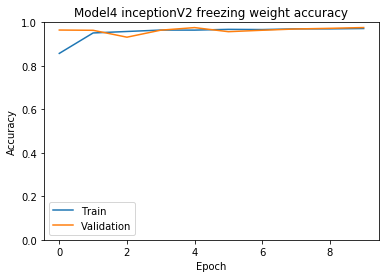

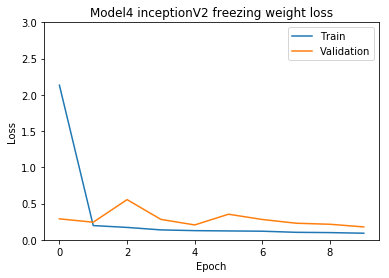

In [54]:
# Plot training & validation accuracy values
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model4 inceptionV2 freezing weight accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model4 inceptionV2 freezing weight loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim([0, 3])
plt.legend(['Train', 'Validation'])
plt.show()

In [83]:
test_filenames = os.listdir("./dataset/test_set/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]
nb_samples

2423

In [84]:
test_df

,filename
0,0007d6cf88afaa4a.jpg
1,0008e425fb49a2bf.jpg
2,00183df6ffe09093.jpg
3,00493fdf106b5fdf.jpg
4,00567dcce4a5f7d9-checkpoint.jpg
5,00567dcce4a5f7d9.jpg
6,0060dfb7f9a468b5.jpg
7,00b29a6f872b1e1d.jpg
8,00b6be538644be0b.jpg
9,00bd6fef2f8cfd58.jpg


In [85]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "./dataset/test_set/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=False
)

Found 2423 images.


In [86]:
predict = model2.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size), verbose=1)

152/152 [==============================] - 39s 260ms/step


In [87]:
len(predict)

2423

In [88]:
predict

array([[0.08559157, 0.9616034 , 0.00312574],
       [0.00476226, 0.9988961 , 0.01236076],
       [0.00387491, 0.00409447, 0.9999969 ],
       ...,
       [0.12386271, 0.4610069 , 0.09714804],
       [0.0045619 , 0.00127851, 0.999992  ],
       [0.00652012, 0.00963619, 0.9994635 ]], dtype=float32)

In [89]:
test_df['label'] = np.argmax(predict, axis=-1)

In [90]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['label'] = test_df['label'].replace(label_map)

In [92]:
test_df['label'].value_counts()

cat      973
dog      748
other    702
Name: label, dtype: int64

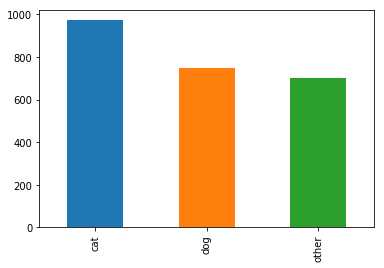

In [91]:
test_df['label'].value_counts().plot.bar()

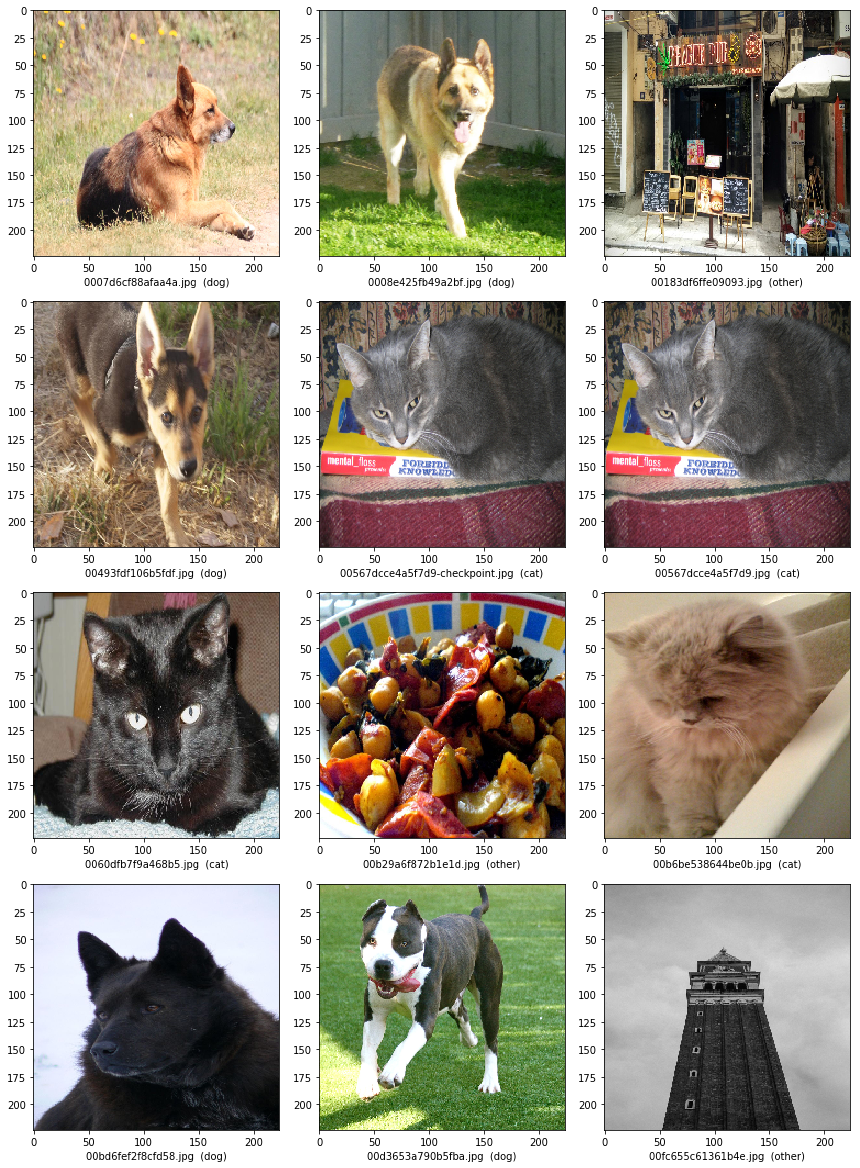

In [96]:
sample_test = test_df.head(12)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['label']
    img = load_img("./dataset/test_set/"+filename, target_size=(image_size,image_size))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '  (' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()